# Stark map for Rydberg helium

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm

In [2]:
# quantum numbers
nmin = 50
nmax = 50
S = 1
n_vals, L_vals, m_vals = get_nlm_vals(nmin, nmax)
J_vals = get_J_vals(S, L_vals, 1)
# quantum defects
neff = n_vals - get_qd(S, n_vals, L_vals, J_vals)
# energy levels
En = W_n(S, n_vals, L_vals, J_vals)
# field-free Hamiltonian
H_0 = np.diag(En)
# find the off-diagonal terms of the Stark interaction matrix
mat_S = stark_matrix(neff, L_vals, m_vals)

calculate Stark terms: 100%|██████████| 2500/2500 [00:45<00:00, 54.96it/s] 


In [3]:
# specify the electric field
field = np.linspace(0.00, 0.50, 11) # V /cm
field_au = field * 100 * e * a_0 / En_h
# specify the magnetic field (in Telsa)
B_z = 1.5776E-3 / (2.35*10**5)
# Zeeman interaction Hamiltonian
H_Z = np.diag(E_zeeman(m_vals, B_z))
# diagonalise for each field
map1 = stark_map(H_0, mat_S, field_au, H_Z=H_Z)

diagonalise Hamiltonian: 100%|██████████| 11/11 [00:45<00:00,  4.01s/it]


Plotting: 100%|██████████| 2500/2500 [00:08<00:00, 279.87it/s]


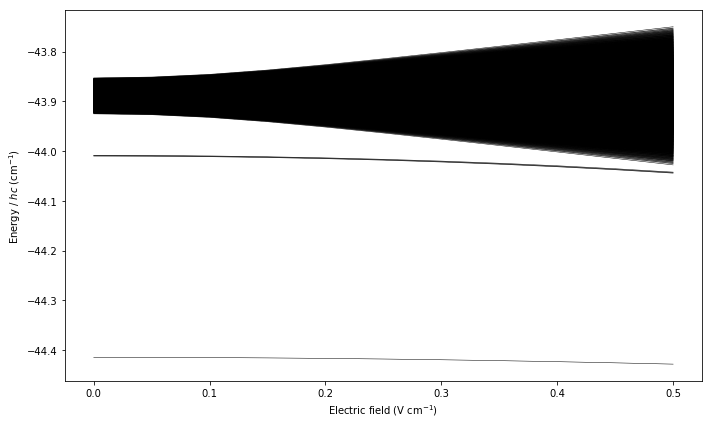

In [4]:
# Stark map
fig, ax = plt.subplots(figsize=(10, 6))

for s0 in trange(np.shape(map1)[1], desc='Plotting'):
    ax.plot(field, 0.01*map1[:, s0] * En_h /(h * c), c='k', ls='-', marker='', lw=0.5)

# highlight (assuming states do not cross)
#idx = np.intersect1d(np.where(n_vals == 40), np.where(L_vals == 0))
#for i in tqdm(idx, desc='Highlighting'):
#    ax.plot(field, 0.01*map1[:, i] * En_h /(h * c), c='r', ls='-', lw=1.5)
    
# format
#ax.set_ylim(-70.8, -70)
#ax.set_xlim(0, 10)
ax.set_xlabel('Electric field (V cm$^{-1}$)')
ax.set_ylabel('Energy / $h c$ (cm$^{-1}$)')
plt.tight_layout()
# output
fileout = os.path.join("..", "images", "n50-n60_stark_map.png")
plt.savefig(fileout)
plt.show()
plt.show()

# Write and Read files

In [5]:
fileout = os.path.join("..", "data", "E_0-00_0-50_11_B_1-5776.csv")
np.savetxt(fileout, map1, delimiter=",")

In [6]:
filein = os.path.join("..", "data", "E_0-00_0-50_11_B_1-5776.csv")
map2 = np.genfromtxt(filein, delimiter=",")